## SNP visulization and quality checks using seaborn 

 ### Required packages
 - [Seaborn](https://seaborn.pydata.org)
 - [Pandas](https://pandas.pydata.org/) 
 - [Numpy](https://numpy.org/) 
 - [Matplotlib](https://matplotlib.org/) 
 
 ### Inputs
 - Geneious SNP analysis of _k13_, _crt_, _mdr1_, _dhfr_, _dhps_, and _cytb_
 - Documentation on Geneious analysis can be found: 
 - Geneious outputs were modified to current input data .csv using XXX 
 
 
 ### Data structure 
 - [Long-form](https://seaborn.pydata.org/tutorial/data_structure.html#long-form-vs-wide-form-data) 
     - Each variable is a column 
     
         - "Sample" = *AMD ID*, including associated meta-data for each sample
             - AMD ID and bit code key is found under MS Teams > Domestic > Files > Sample Naming > Sample_naming_key.pptx  
   
             - Key: **Year Country State/Site DayofTreatment Treatment SampleID Genus SampleType GeneMarker-8bitcode SampleSeqCount**
             
                 - Example:
                     - Individual sequenced sample ID: 17GNDo00F0001PfF1290 = 2017 Guinea Dorota Day0 AS+AQ 0001 P.falciparum FilterBloodSpot k13-crt-mdr-dhfr-dhps-cytB-cpmp-pfs47 
                     
                     - Pooled sequenced sample ID: 17GNDoxxx001P10F1290 = 2017 Guinea Dorota **xx x** 001 **Pooled SamplesInPool** P.falciparum FilterBloodSpot k13-crt-mdr-dhfr-dhps-cytB-cpmp-pfs47 
                 
                         - NOTE: If information is not availble (na) **x** is used. For pooled samples, DayofTreatment and Treatment is na since its a pool of multiple samples with that info. 
                         - NOTE: For pooled samples, **Genus** is replaced with **Pooled** and **SampleType** with **SamplesInPool** to indicated this as a pooled sequenced sample and sample count in each pool. 
         <p>&nbsp;</p>
         - "Seq_method" = describes the sequencing method, either individually sequenced or pooled 
         - "Year" = the year the study was conducted 
         - "Site" = the state or province 
         - "Day_of_treatment" = describes the day of treatment provided to the patient 
         - "Gene" = drug resistant gene(s) 
         - "G_annotation" = full SNP annotation in the following format: WildTypeAA-CodonPosition-MutantAA 
         - "Coverage" = the number of reads covering the SNP 
         - "VAF" = variant allele frequency calculated by AA divided by total reads in loci 
         - "SNP" = single nucleotide polymorphism in WildTypeAA or MutantAA annotation format 
         - "Type" = describes if it is a wild type or mutant SNP 
         
     - Each observation is a row for each sample ID (patient ID) 
 
 #### TODO
 
 #### Activity Name
 - [ ] Update Geneious merge scripts to use the above described headers and generate new reports @Je-Hoon 01-31-2022 
 - [ ] Review #TODO below in code and address #TODOs @Je-Hoon 01-31-2022 
 - [ ] Make code more ["pythonic"](https://realpython.com/learning-paths/writing-pythonic-code/) 
 - [ ] Update this README 
    
 #### Completed Activity ✓
 - [x] Create a README @Eldin 01-31-2022
 - [x] Document code @Eldin 01-31-2022
 
 
 #### Task 
 _Template_ 
 
 - [ ] Task title ~3d #type @name yyyy-mm-dd
    - [ ] Sub-task description 

The number of rows, columns: (2590, 12)

There are 73 samples in this dataset.

The number of null or NA values in data:
Sample          0
Pooled          0
Year            0
SITE            0
TreatmentDay    0
GENE            0
G_annotation    0
COVERAGE        0
VAF             0
VF              0
SNP             0
TYPE            0
dtype: int64

Plotting all SNPs categorized as wildtype or mutant using seaborn:


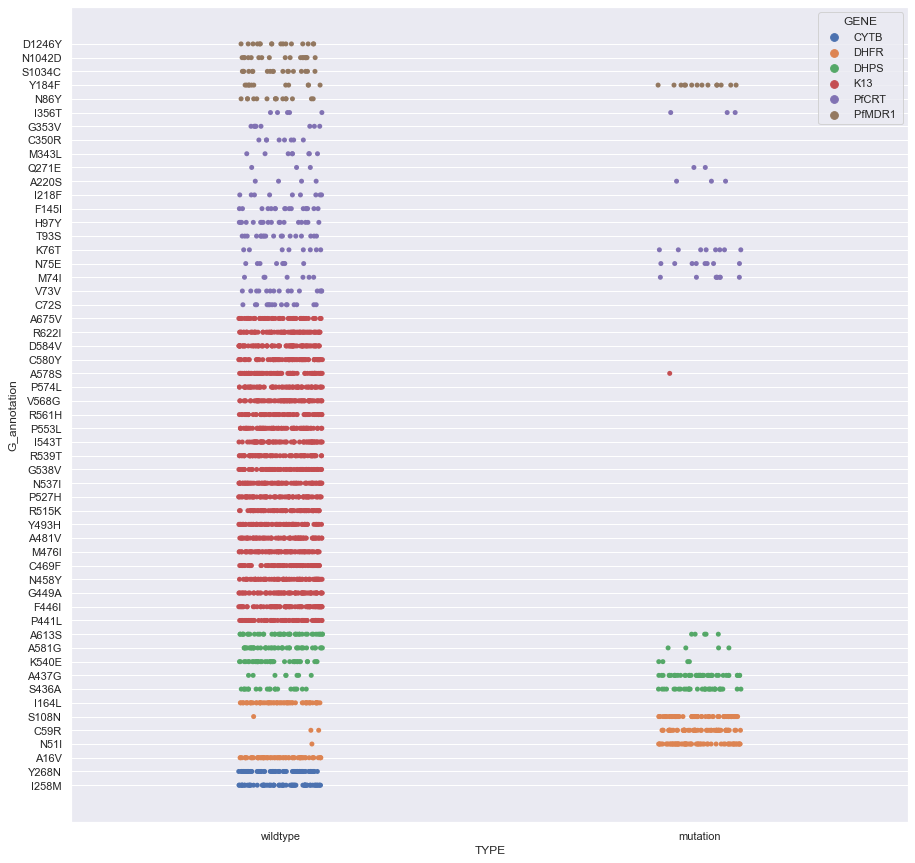

In [70]:
# Import dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load data
df = pd.read_csv("data/GN17_18_19_individual_EPI.csv")


# Check dataframe is correct 
df.head()

# Print number of rows and columns; confirm its longform data
print('The number of rows, columns:', df.shape) 
print('') # add space 

# Count number of unique samples in data 
uniq = df['Sample']
print('There are', uniq.nunique(), 'samples in this dataset.')
print('') # add space 

# Check if there are any Null or NAs 

print('The number of null or NA values in data:')
print(df.isnull().sum())
print('') # add space 

# Sort data based on CODONS to ensure shown as ascending/descending in plot 

LS = df['G_annotation']  # Copy the full annotated SNPs into a new list called LS 

codon_num = [] # create an empty list 

# Loop through G_annotation list (LS) and strip first and last character 
for x in LS: 
    codon_num.append(int(x[1:-1]))  # IMPORTANTLY change from string to integer to allow num sorting 
    ## TODO: make this more pythonic and use rstrip() and lstrip().left()

# Add the new Codon column to the current dataframe 
df['Codon'] = codon_num

# Set seaborn plot style and size (NOTE: some plots will not be affected; see seaborn docs) 

#sns.set_style("whitegrid")

# Set plot/figure size 
sns.set(rc = {'figure.figsize':(15,15)})

print('Plotting all SNPs categorized as wildtype or mutant using seaborn:')

# Plot as seaborn strippplot sorting by Codon # and then Gene in ascending order 

g= sns.stripplot(data=df.sort_values(by=['GENE','Codon'], ascending=True),
               x="TYPE", y="G_annotation",
                 hue="GENE")  



# Use catplot() to combine stripplot() and FacetGrid to further categorize data; below example is by Year 

# g= sns.catplot(data=df.sort_values(by=['GENE','Codon'], ascending=True),
#                x="TYPE", y="G_annotation", 
#                hue="GENE", col="Year")  

##TODO: 
## Adjsust size for catplot, difficult to see as is. Need to look at seaborn docs. 
## Figure out why sorting is broken (might to do something with iteration of catplot() 

#Save dataframe to csv 

# df.to_csv('organized.csv')

In [42]:

### BELOW IS SOME IF NEEDED CODE

### DROPPING NULL/NA VALUES use below; inplace = use current df, if True will overwrite 
## Better to save it as a new dataframe: df_minusNA = df.dropna(how='all', inplace=True)

# df.dropna(how='all', inplace=True)

### CONVERSION OF DTYPES: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.infer_objects.html 
# df.infer_objects()  # softe conversion of object-dtyped columns 
# df.dtypes           # check dtypes

## EXAMPLE DTYPE CONVERSIONS

# df['Gene']=df['Gene'].astype(str)  # Change to string 

# df['Gene'] =pd.Categorical(df['Gene'], ['MT','Pfmdr1','Pfcrt','Pfdhps','Pfdhfr','Pfk13'])  # change to categorical dtype 

# Changing of multiple dtypes. For example, G_annoation, Type and Gene to categorical types 

# df.astype({'G_annotation':'category','Gene':'category', 'Type':'category'}).dtypes

# Another way to do it: Use dictionary to convert dtypes 

# convert_dic = {'G_annotation':'category',
#                'Gene':'category',
#                'Type':'category'}

# df = df.astype(convert_dic) 

## SORTING OF DATA 
# To sort by specific column: 

# df.sort_values(by='Gene')

## CONVERSION OF DTYPE 
# df['Gene']=df['Gene'].astype(str)


## SLICING DF TO CREATE NEW DFS 

# Create year specific df, drop rows with specific condition 

# df1 = df.drop(df[df['YEAR'] == 2018].index)    # Drop 2018 records and save as df1 
  
# df2 = df1.drop(df1[df1['YEAR'] == 2019].index) # Drop 2018 records and save as df1